In [34]:
using LinearAlgebra
using Plots

In [35]:
function Harr(n)    #Genera Matrices Ortogonales con ayuda de la mdeida de Harr O(n) con entradas imagniarias
    z = (randn(n,n) + im*randn(n,n))/sqrt(2.0)
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

Harr (generic function with 1 method)

In [36]:
Harr(3)

3×3 Array{Complex{Float64},2}:
  0.708723+0.180665im  -0.220923+0.0919941im  -0.365722-0.523497im 
 0.0764747+0.215178im   0.654095+0.710256im    0.113115-0.0524541im
 -0.395341+0.506584im  0.0831404-0.0592819im  -0.750128+0.118151im 

In [37]:
function HarR(n) #Genera Matrices Ortogonales con ayuda de la mdeida de Harr O(n) Con entradas reales
    z = (randn(n,n))
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

HarR (generic function with 1 method)

In [38]:
HarR(3)

3×3 Array{Float64,2}:
  0.754124  -0.133928  -0.642931
  0.11075   -0.93903    0.325512
 -0.647326  -0.316681  -0.693312

In [39]:
λ=Complex{Float64}[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
for i in 1:1000
    append!(λ,eigvals(HarR(100)))
end

In [40]:
function lam_eigenvals_C(λ::Array{Complex{Float64},1})
    λr=Complex{Float64}[]
    for i=1:length(λ)
        if imag(λ[i]) != 0
            push!(λr,λ[i])
        end
    end
    return λr
end

lam_eigenvals_C (generic function with 1 method)

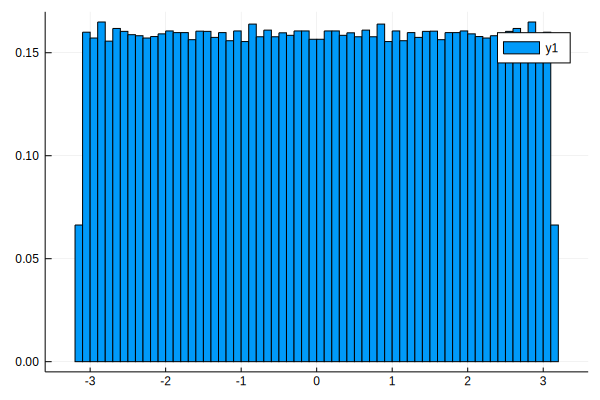

In [41]:
histogram(angle.(lam_eigenvals_C(λ)),normalized=true,bins=60) #Histogrma del angulo de los eigenvalorees de las matrices aleaotrias O(3)

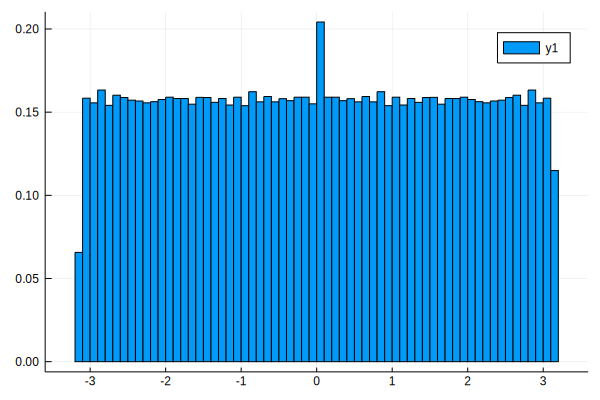

In [42]:
histogram(angle.(λ),normalized=true,bins=60)  #Histogrma del angulo de los eigenvalorees complejos y reales de las matrices aleaotrias O(3)

In [10]:
scatter(real(λ),imag(λ),aspect_ratio=:equal);

In [79]:
function TrayectoriaRale(t::AbstractArray,Δt::Float64)
    T_v0=[1.0,0.0,0.0]     #Es el vector tangente inicial
    N_v0=[0.0,1.0,0.0]   #Es el vector tangente inicial
    B_v0=[0.0,0.0,1.0]      #Es el vector tangente inicial
    ##########################################
    T_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    N_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    B_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    for i=1:length(t)  #For que dura todos los pasos de tiempo
        M=HarR(3)
        T_v0=M*T_v0      #Genera todos los vecotres tangentes a partir del inicial
        N_v0=M*N_v0      #Genera todos los vecotres tangentes a partir del inicial
        B_v0=M*B_v0      #Genera todos los vecotres tangentes a partir del inicial
        push!(T_v,real(T_v0))    #Coloca los vectores tangentes en una lista
        push!(N_v,real(N_v0))    #Coloca los vectores tangentes en una lista
        push!(B_v,real(B_v0))    #Coloca los vectores tangentes en una lista
    end
    T_v=transpose(hcat(T_v...))     #Transforma T en algo mejor
    N_v=transpose(hcat(N_v...))     #Transforma N en algo mejor
    B_v=transpose(hcat(B_v...))     #Transforma B en algo mejor
    ##########################################
    Tx=T_v[:,1]
    Ty=T_v[:,2]
    Tz=T_v[:,3]
    ##########################################
    rx=Float64[]
    ry=Float64[]
    rz=Float64[]
    r1x=0.0
    r1y=0.0
    r1z=0.0
    for i=1:length(t)
        r1x=Tx[i]*Δt+r1x
        r1y=Ty[i]*Δt+r1y
        r1z=Tz[i]*Δt+r1z
        push!(rx,r1x)
        push!(ry,r1y)
        push!(rz,r1z)
    end
    r=[rx,ry,rz]
    T=[Tx,Ty,Tz]
    N=[N_v[:,1],N_v[:,2],N_v[:,3]]
    B=[B_v[:,1],B_v[:,2],B_v[:,3]]
    return r,T,N,B
end

TrayectoriaRale (generic function with 1 method)

In [80]:
Δt=0.01
t=0:Δt:1
@time r,Tm,Nm,Bm=TrayectoriaRale(t,Δt);

  0.058268 seconds (126.86 k allocations: 6.790 MiB)


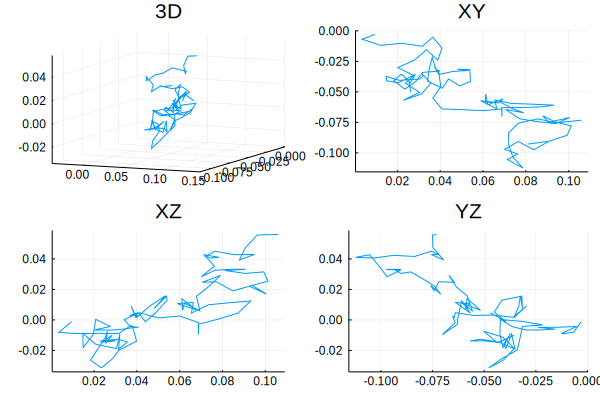

In [81]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(r[1],r[2],r[3], legend=false,title="3D",aspect_ratio=:equal)
P2=plot(r[1],r[2],legend=false,title="XY")
P3=plot(r[1],r[3],legend=false,title="XZ")
P4=plot(r[2],r[3],legend=false,title="YZ")
plot(P1,P2,P3,P4,layout=l)

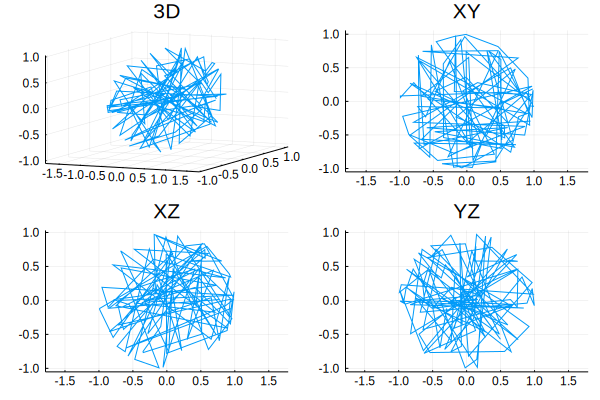

In [82]:
plot(Tm[1],Tm[2],Tm[3], legend=false)
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(Tm[1],Tm[2],Tm[3], legend=false,title="3D",aspect_ratio=:equal)
P2=plot(Tm[1],Tm[2],legend=false,title="XY",aspect_ratio=:equal)
P3=plot(Tm[1],Tm[3],legend=false,title="XZ",aspect_ratio=:equal)
P4=plot(Tm[2],Tm[3],legend=false,title="YZ",aspect_ratio=:equal)
plot(P1,P2,P3,P4,layout=l)

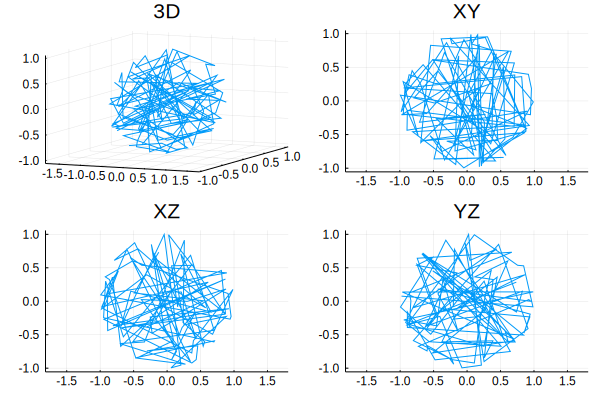

In [83]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(Nm[1],Nm[2],Nm[3], legend=false,title="3D",aspect_ratio=:equal)
P2=plot(Nm[1],Nm[2],legend=false,title="XY",aspect_ratio=:equal)
P3=plot(Nm[1],Nm[3],legend=false,title="XZ",aspect_ratio=:equal)
P4=plot(Nm[2],Nm[3],legend=false,title="YZ",aspect_ratio=:equal)
plot(P1,P2,P3,P4,layout=l)

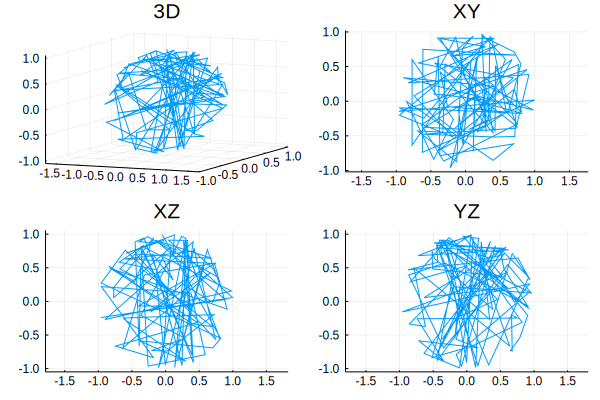

In [84]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(Bm[1],Bm[2],Bm[3], legend=false,title="3D",aspect_ratio=:equal)
P2=plot(Bm[1],Bm[2],legend=false,title="XY",aspect_ratio=:equal)
P3=plot(Bm[1],Bm[3],legend=false,title="XZ",aspect_ratio=:equal)
P4=plot(Bm[2],Bm[3],legend=false,title="YZ",aspect_ratio=:equal)
plot(P1,P2,P3,P4,layout=l)

In [92]:
HarR(3)

3×3 Array{Float64,2}:
 -0.155151   0.689097  -0.707865  
  0.149973  -0.691807  -0.706336  
 -0.976441  -0.215749   0.00398862

In [28]:
eigvals(Harr(2))

2-element Array{Complex{Float64},1}:
 -0.6564400011216365 + 0.7543782373103193im
   0.948069369307753 - 0.3180636272515287im

In [29]:
HarR(2)

2×2 Array{Float64,2}:
 -1.0           1.38778e-17
  2.77556e-17  -1.0        

In [30]:
λ2=Complex{Float64}[]
for i=1:10000
    n=randn()
    R2=[cos(n) -sin(n); sin(n) cos(n)]
    append!(λ2,eigvals(R2))
end

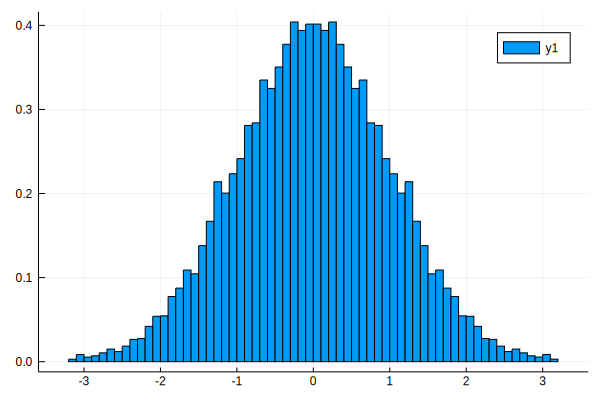

In [31]:
histogram(angle.(λ2),normalized=true,bins=60)

In [32]:
using Distributions

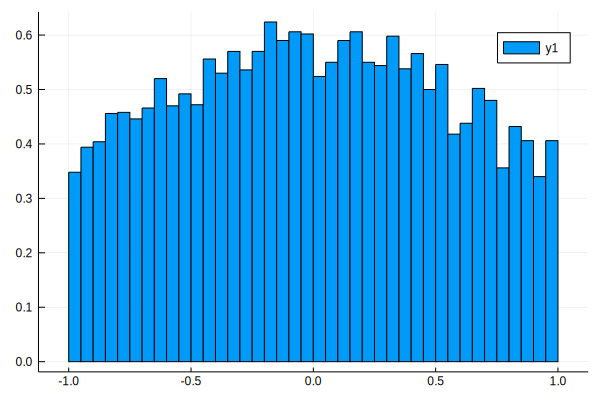

In [33]:
mu = 0    #The mean of the truncated Normal
sigma = 1 #The standard deviation of the truncated Normal
lb = -1    #The truncation lower bound
ub = 1    #The truncation upper bound
d = Truncated(Normal(mu, sigma), lb, ub)  #Construct the distribution type
x = rand(d,10000) #Simulate 100 obs from the truncated Normal
histogram(x,normalized=true,bins=60)

In [38]:
λ2=Complex{Float64}[]
for i=1:100000
    a=rand(d)
    b=rand(d)
    R2=[a -b; b a ]
    append!(λ2,eigvals(R2))
end

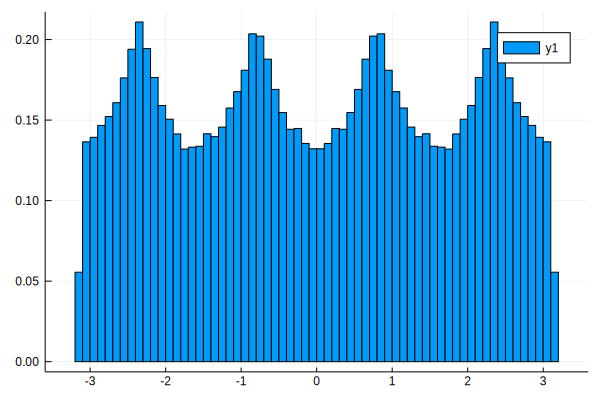

In [39]:
histogram(angle.(λ2),normalized=true,bins=60)

In [1]:
using PyPlot

pygui(true)

fig = figure()
ax = fig[:gca](projection="3d")

N = 10
x,y,z,u,v,w = [randn(N) for _ in 1:6]
ax[:quiver](x,y,z, u,v,w)

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = top-level scope at In[1]:6
└ @ Core In[1]:6


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\sebas\.julia\packages\PyCall\zqDXB\src\pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError("Unknown projection '3d'",)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\figure.py", line 1863, in gca
    return self.add_subplot(1, 1, 1, **kwargs)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\figure.py", line 1349, in add_subplot
    self, *args, **kwargs)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\projections\__init__.py", line 81, in process_projection_requirements
    projection_class = get_projection_class(projection)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\projections\__init__.py", line 60, in get_projection_class
    raise ValueError("Unknown projection %r" % projection)


In [24]:
n=100

100

In [31]:
λp=Complex{Float64}[]
for i=1:1000
    z = (randn(n,n))
    Q,R= qr(z)
    append!(λp,eigvals(Q))
end

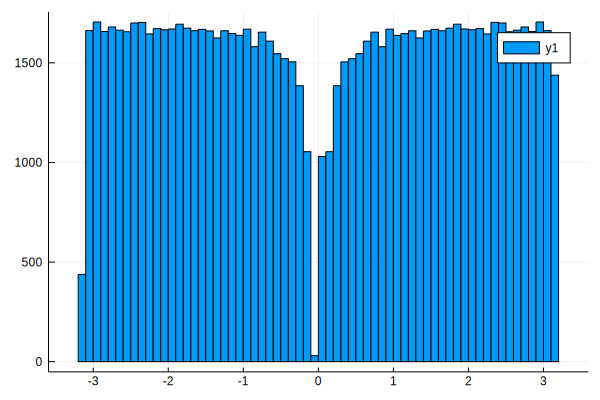

In [33]:
histogram(angle.(λp),bins=100)

In [28]:
scatter(real.(λp),imag.(λp));